# MLP Neural Network Implementation to predict Credit Card Insolvency

* A simple Multi Layer Perceptron Model from Scikit Learn will be employed

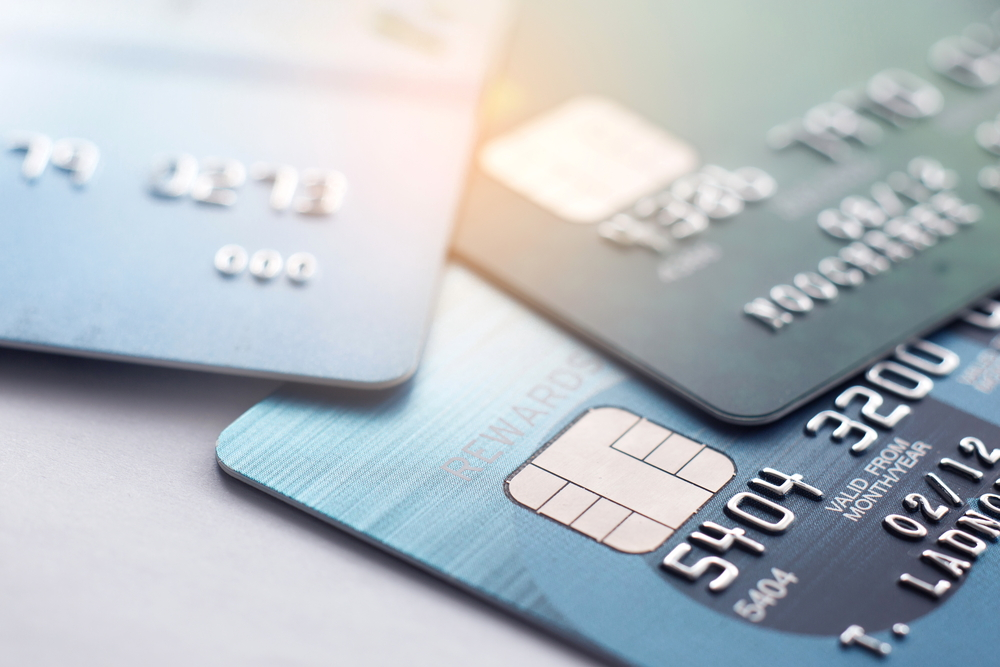

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neural_network import MLPClassifier
from scikitplot.metrics import plot_confusion_matrix, plot_roc, plot_cumulative_gain
from sklearn.metrics import classification_report
import warnings
warnings.filterwarnings('ignore')
import os
%matplotlib inline


df=pd.read_csv('../input/default-of-credit-card-clients-dataset/UCI_Credit_Card.csv')

In [2]:
#checking the first 5 observations
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [3]:
#checking the structure of columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          30000 non-null  int64  
 1   LIMIT_BAL                   30000 non-null  float64
 2   SEX                         30000 non-null  int64  
 3   EDUCATION                   30000 non-null  int64  
 4   MARRIAGE                    30000 non-null  int64  
 5   AGE                         30000 non-null  int64  
 6   PAY_0                       30000 non-null  int64  
 7   PAY_2                       30000 non-null  int64  
 8   PAY_3                       30000 non-null  int64  
 9   PAY_4                       30000 non-null  int64  
 10  PAY_5                       30000 non-null  int64  
 11  PAY_6                       30000 non-null  int64  
 12  BILL_AMT1                   30000 non-null  float64
 13  BILL_AMT2                   300

In [4]:
#nulls

df.isnull().sum()

ID                            0
LIMIT_BAL                     0
SEX                           0
EDUCATION                     0
MARRIAGE                      0
AGE                           0
PAY_0                         0
PAY_2                         0
PAY_3                         0
PAY_4                         0
PAY_5                         0
PAY_6                         0
BILL_AMT1                     0
BILL_AMT2                     0
BILL_AMT3                     0
BILL_AMT4                     0
BILL_AMT5                     0
BILL_AMT6                     0
PAY_AMT1                      0
PAY_AMT2                      0
PAY_AMT3                      0
PAY_AMT4                      0
PAY_AMT5                      0
PAY_AMT6                      0
default.payment.next.month    0
dtype: int64

In [5]:
#Number of unique values per column - this will help us see if there are variables that should be categorical 

df.nunique()

ID                            30000
LIMIT_BAL                        81
SEX                               2
EDUCATION                         7
MARRIAGE                          4
AGE                              56
PAY_0                            11
PAY_2                            11
PAY_3                            11
PAY_4                            11
PAY_5                            10
PAY_6                            10
BILL_AMT1                     22723
BILL_AMT2                     22346
BILL_AMT3                     22026
BILL_AMT4                     21548
BILL_AMT5                     21010
BILL_AMT6                     20604
PAY_AMT1                       7943
PAY_AMT2                       7899
PAY_AMT3                       7518
PAY_AMT4                       6937
PAY_AMT5                       6897
PAY_AMT6                       6939
default.payment.next.month        2
dtype: int64

In [6]:
#We don´t need the ID variable

df.drop('ID', axis=1, inplace=True)

In [7]:
#converting the variables with up to 11 levels into categorical 

categorical=df.iloc[:,(df.nunique()<=11).values].columns
df[categorical]=df[categorical].astype('category')

#Contunuous data columns

continuous=df.select_dtypes(['int64','float64']).columns

In [8]:
#Description of categorical data

df.describe(include='category')

,SEX,EDUCATION,MARRIAGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,default.payment.next.month
count,30000,30000,30000,30000,30000,30000,30000,30000,30000,30000
unique,2,7,4,11,11,11,11,10,10,2
top,2,2,2,0,0,0,0,0,0,0
freq,18112,14030,15964,14737,15730,15764,16455,16947,16286,23364


In [9]:
#Description of continuous data

df.describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000
mean,167484.322667,35.485500,51223.330900,49179.075167,4.701315e+04,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567
std,129747.661567,9.217904,73635.860576,71173.768783,6.934939e+04,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775
min,10000.000000,21.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3558.750000,2984.750000,2.666250e+03,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000
50%,140000.000000,34.000000,22381.500000,21200.000000,2.008850e+04,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67091.000000,64006.250000,6.016475e+04,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000
max,1000000.000000,79.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000


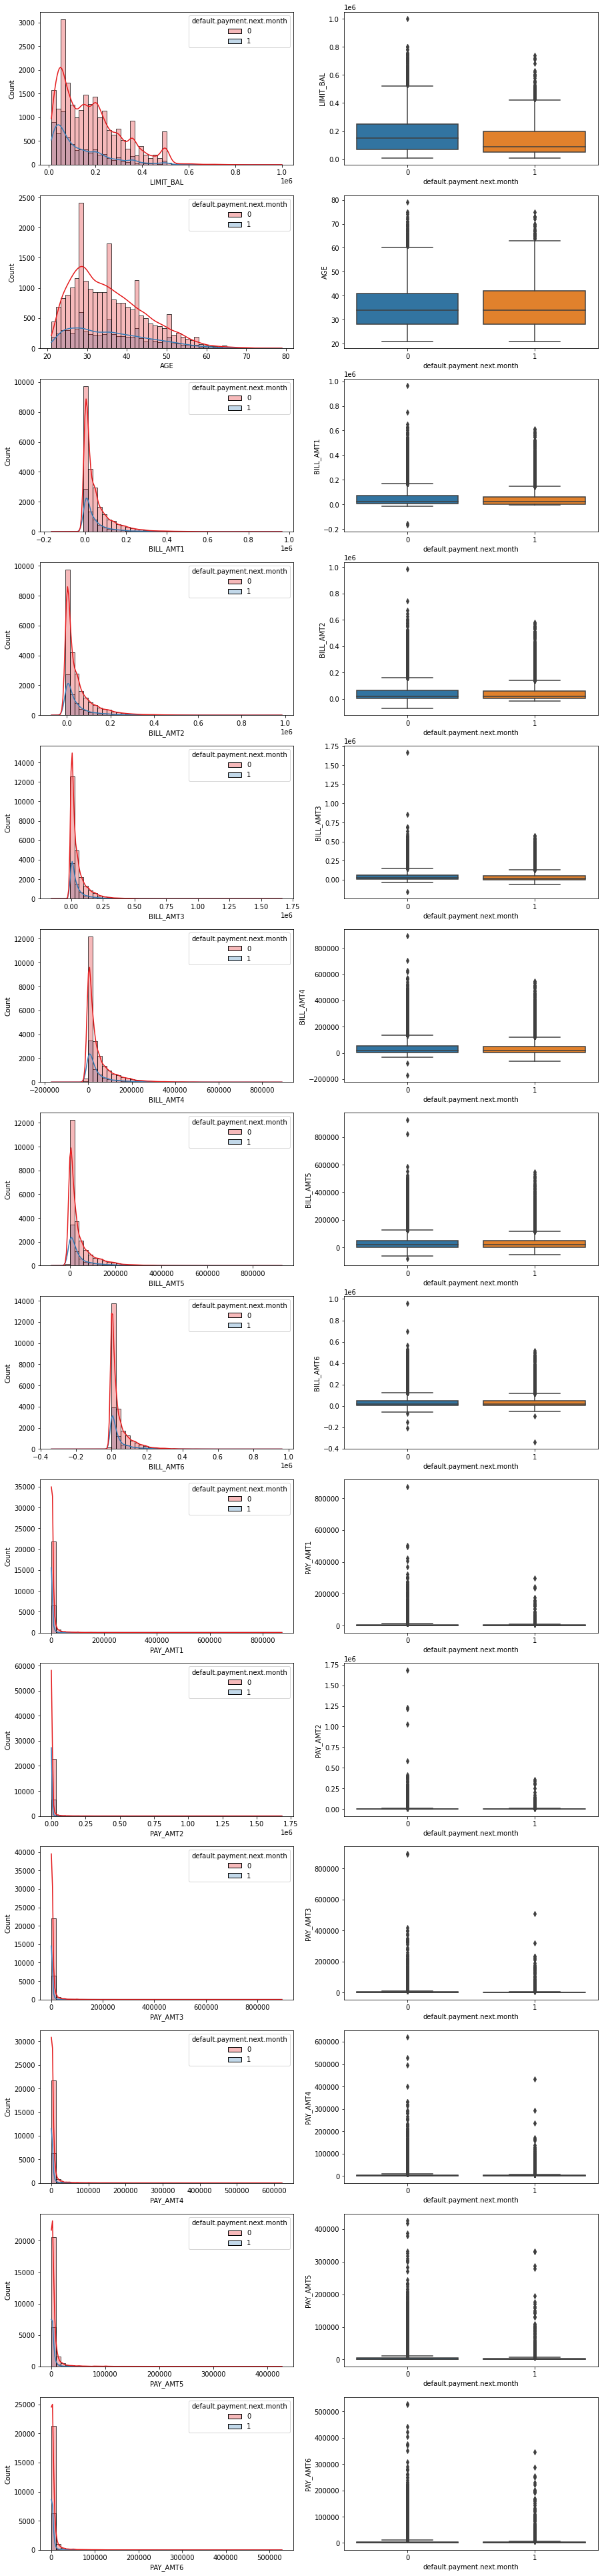

In [10]:
#Visualization of continuous variables  and bivariate distribution with the target. One will see the 
#distributions are highly skewed and judging from the boxplots the variables don´t seem to be good 
#predictors

fig,axes= plt.subplots(nrows=len(continuous), ncols=2, figsize=(15,70))
for i,var in enumerate(continuous):
    sns.histplot(data=df, x=df[continuous[i]], bins=50, ax=axes[i][0], kde=True,\
                 hue='default.payment.next.month', palette='Set1', alpha=0.3)


    sns.boxplot(y=df[continuous[i]], x=df['default.payment.next.month'], ax=axes[i][1])   
plt.show()

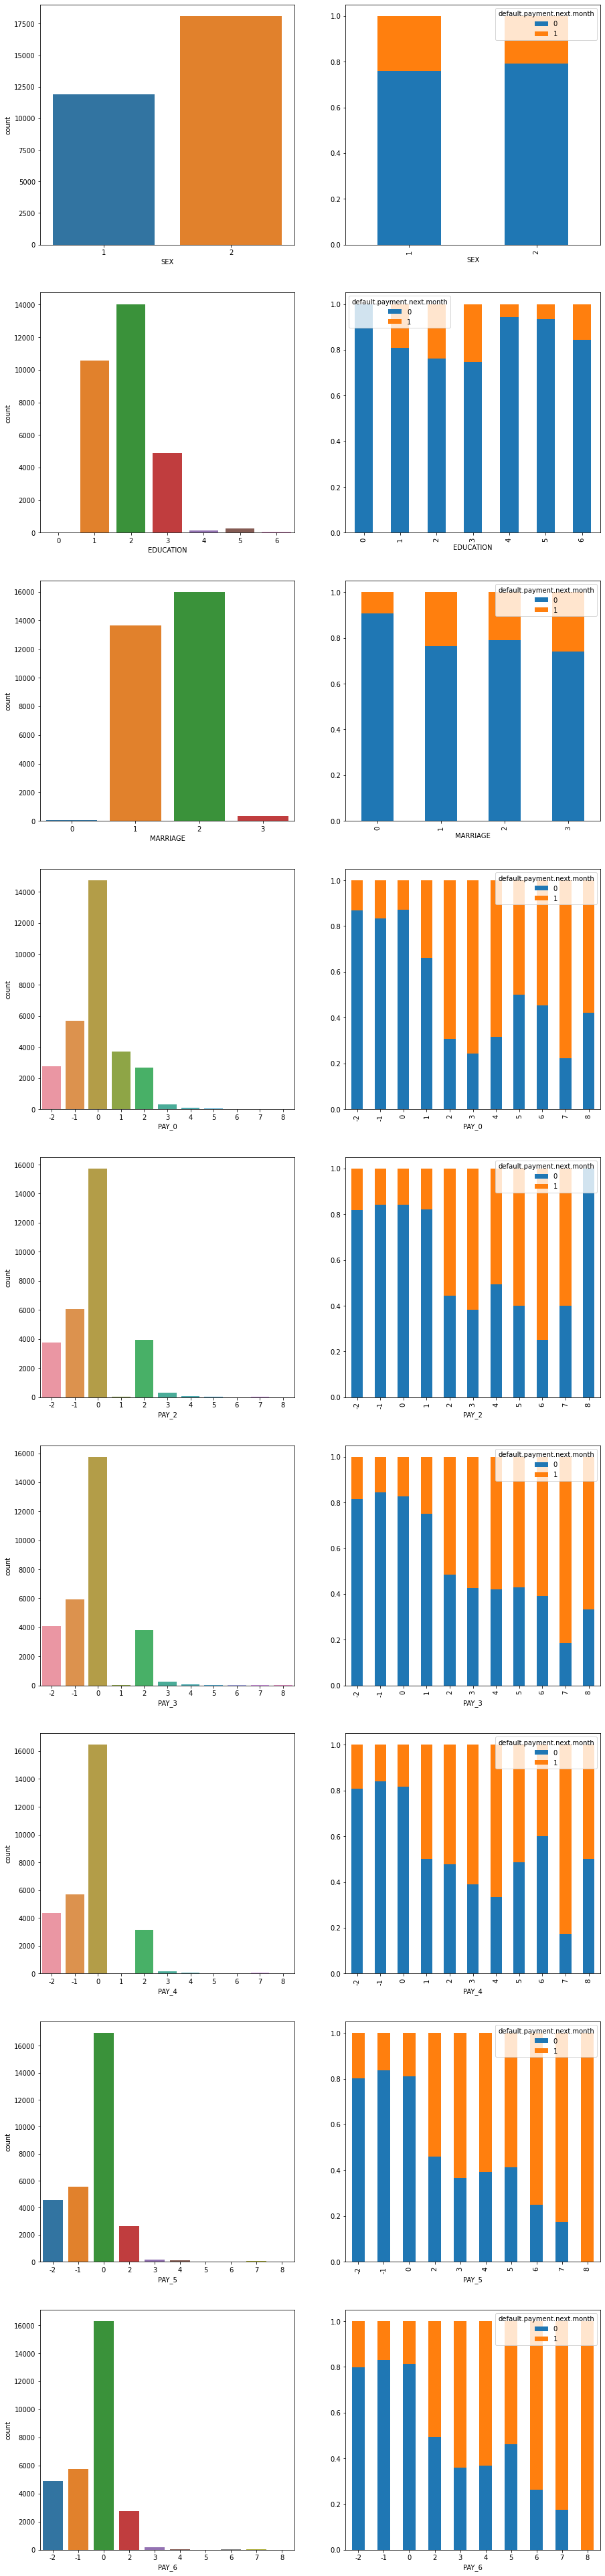

In [11]:
#Visualizing categorical variables:
#to the left univariate distribution/to the right bivariate with the target

fig,axes= plt.subplots(nrows=len(categorical[:-1]), ncols=2, figsize=(15,70))
for i,var in enumerate(categorical[:-1]):
    sns.countplot(df[categorical[i]], ax=axes[i][0])

    pd.crosstab(df[var], df['default.payment.next.month'], normalize='index').plot(kind='bar', stacked=True, ax=axes[i][1])
    plt.xticks(rotation=0)
plt.show()

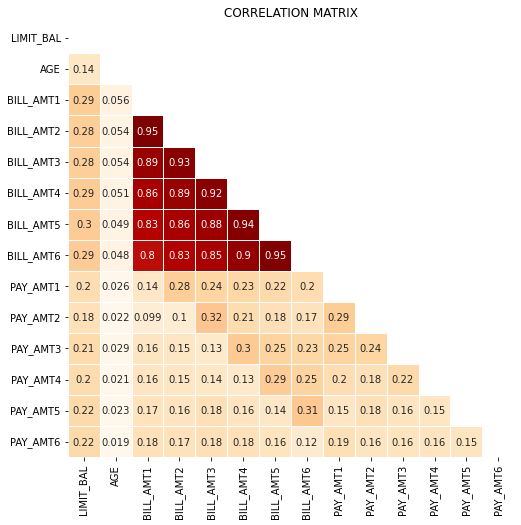

In [12]:
#Correlation - continuous variables 
mask=np.triu(np.ones(len(continuous)))
figure=plt.figure(figsize=(8,8))
sns.heatmap(df[continuous].corr(), cmap='OrRd', linewidths=0.5, cbar=False, mask=mask, annot=True)
plt.title('CORRELATION MATRIX')
plt.show()

In [13]:
#There is a strong multicollinearity of "Bill" variables. we will leave only the first one among them

df.drop(df.columns[12:17], axis=1, inplace=True)

In [14]:
#Separating the target variable 

y=df['default.payment.next.month']
df.drop('default.payment.next.month', axis=1, inplace=True)


In [15]:
#Separating the data into train and test batches

X_train,X_test,y_train,y_test=train_test_split(df,y, train_size=0.8)

#Scaling the data data

scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [16]:
#Fitting the model while tuning the best hyperparameters

model = MLPClassifier(activation='relu', solver='adam', random_state=0, hidden_layer_sizes=(16,12,10), batch_size=200)

params={'alpha':[0.2, 0.205, 0.21, 0.215,0.22], 'max_iter':[200,220]}

grid=GridSearchCV(model, params , cv=5, n_jobs=-1)
grid.fit(X_train, y_train)
print(grid.best_params_)

{'alpha': 0.21, 'max_iter': 200}


In [17]:
#Prediction of probabilities 

pred_train_proba=grid.predict_proba(X_train)
pred_test_proba=grid.predict_proba(X_test)

<AxesSubplot:title={'center':'ROC Curves'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

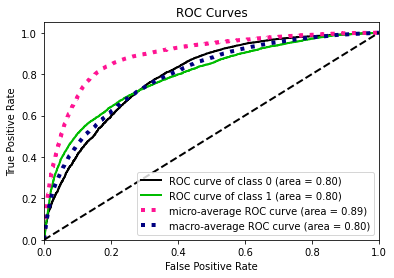

In [18]:
#AUC plot - train data 
plot_roc(y_train, pred_train_proba)

<AxesSubplot:title={'center':'Cumulative Gains Curve'}, xlabel='Percentage of sample', ylabel='Gain'>

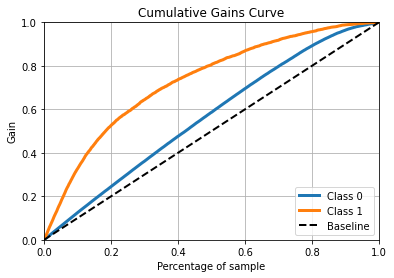

In [19]:
#cumulative gain plot train data

plot_cumulative_gain(y_train, pred_train_proba)

From cumulative gain we can discern that by taking around 30% of the sample (setting the cutoff at 70th percentile of the vector of probabilities of being a hit) we can get to sensitivity of around 62%-65%, however the precision may be low. 

<AxesSubplot:title={'center':'Confusion Matrix'}, xlabel='Predicted label', ylabel='True label'>

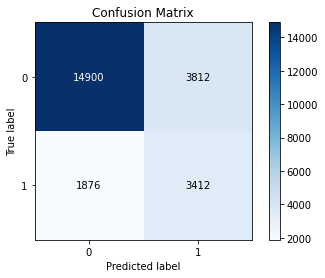

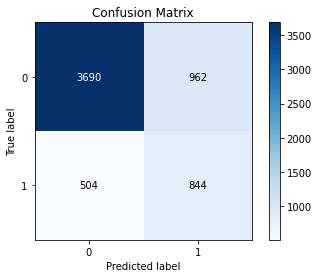

In [20]:
pred_train=np.zeros(len(X_train))
pred_train[pred_train_proba[:,1]>np.percentile(pred_train_proba[:,1], 69.9)]=1

pred_test=np.zeros(len(X_test))
pred_test[pred_test_proba[:,1]>np.percentile(pred_test_proba[:,1], 69.9)]=1

plot_confusion_matrix(y_train, pred_train)
plot_confusion_matrix(y_test, pred_test)

In [21]:
#Metrics

print(f'report train: \n {classification_report(y_train, pred_train)} \n')
print(f'report test: \n {classification_report(y_test, pred_test)}')

report train: 
               precision    recall  f1-score   support

           0       0.89      0.80      0.84     18712
           1       0.47      0.65      0.55      5288

    accuracy                           0.76     24000
   macro avg       0.68      0.72      0.69     24000
weighted avg       0.80      0.76      0.77     24000
 

report test: 
               precision    recall  f1-score   support

           0       0.88      0.79      0.83      4652
           1       0.47      0.63      0.54      1348

    accuracy                           0.76      6000
   macro avg       0.67      0.71      0.68      6000
weighted avg       0.79      0.76      0.77      6000

